In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.datasets import load_digits

digits = load_digits()



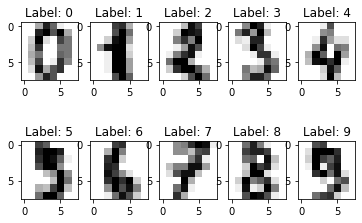

In [6]:
import matplotlib.pyplot as plt

# Display the first 10 images
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"Label: {digits.target[i]}")
plt.show()

In [7]:
data = []
n= digits.images.shape[0]
for i in range(n):
    data.append(digits.images[i].ravel())
    
X = pd.DataFrame(data)

In [8]:
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [43]:
Y = digits.target
Y

array([0, 1, 2, ..., 8, 9, 8])

# Réduction de dimension avec UMAP

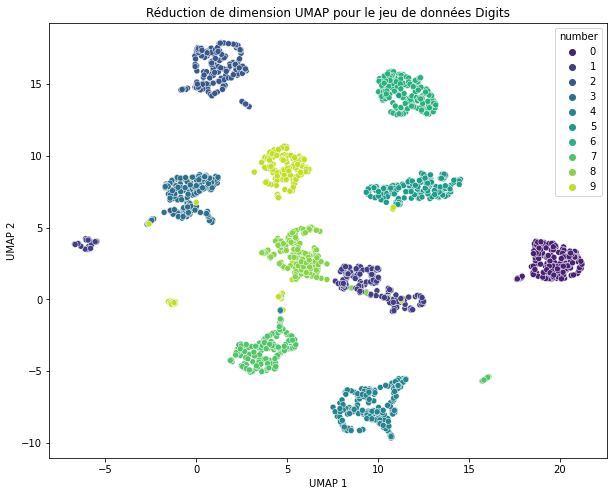

In [44]:
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2)
embedding = reducer.fit_transform(X)

# Création d'un DataFrame pour la visualisation
df = pd.DataFrame({'UMAP 1': embedding[:, 0], 'UMAP 2': embedding[:, 1], 'number': Y})
number_names = {0: '0', 1: '1', 2: '2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9'}
df['number'] = df['number'].map(number_names)

# Visualisation des données réduites avec UMAP
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP 1', y='UMAP 2', hue='number', data=df, palette='viridis')
plt.title('Réduction de dimension UMAP pour le jeu de données Digits')
plt.show()

Composantes principales :
[[-2.01171553e-17 -1.73094625e-02 -2.23428827e-01 -1.35913321e-01
  -3.30322891e-02 -9.66340240e-02 -8.32941225e-03  2.26900170e-03
  -3.20516557e-04 -1.19308898e-01 -2.44451672e-01  1.48512742e-01
  -4.67319387e-02 -2.17740738e-01 -1.48136715e-02  4.47779339e-03
  -4.94137095e-05 -7.95419336e-02  8.33951669e-02  2.15915356e-01
  -1.72126778e-01 -1.63712131e-01  2.86444174e-02  4.23251536e-03
   9.85488218e-05  6.42319140e-02  2.54093323e-01 -3.56771114e-02
  -2.09462544e-01 -4.31311560e-02  5.13118368e-02  2.13422633e-04
   0.00000000e+00  1.59950889e-01  3.68690758e-01  1.64406775e-01
   8.52007941e-02  3.72983335e-02  2.15867045e-02  0.00000000e+00
   1.28865621e-03  1.06945311e-01  3.03067483e-01  2.47813076e-01
   2.09637295e-01  1.22325496e-02 -3.69458321e-02  1.61485045e-03
   6.93023863e-04 -8.35143171e-03 -5.58598699e-02  9.30534532e-02
   1.07387710e-01 -1.37734579e-01 -6.32879319e-02  9.61669246e-04
   9.55082101e-06 -1.40786806e-02 -2.35675472e-01 

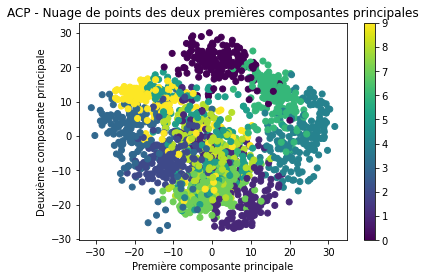

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
df_pca = pca.transform(X)

print("Composantes principales :")
print(pca.components_)

print("\nProportions de variance expliquée :")
print(pca.explained_variance_ratio_)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=Y)
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('ACP - Nuage de points des deux premières composantes principales')
plt.colorbar()
plt.show()